In [5]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
url = "http://grafins.com/ml/compressed_data.zip"
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('.')

In [2]:
import numpy as np
import pandas as pd 
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
import math
import random

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
data_dir = './compressed_data/train/'
img_size = 75
def get_data():
  data = []
  x_data = []
  y_data = []
  i=0;
  for label in labels:
    path = os.path.join(data_dir,label)
    print("Extracting",label)
    for img in os.listdir(path):
      try:
        image = cv2.imread(os.path.join(path,img))
        image = cv2.resize(image,(img_size,img_size))
        data.append([image,i])
      except Exception as e:
        print(e)
    i+=1
  random.shuffle(data)
  for d in data:
    x_data.append(d[0])
    y_data.append(d[1])
  print(len(x_data),len(y_data))
  return np.array(x_data),np.array(y_data),len(x_data)

  



In [6]:
x, y, size = get_data()

Extracting A
Extracting B
Extracting C
Extracting D
Extracting E
Extracting F
Extracting G
Extracting H
Extracting I
Extracting J
Extracting K
Extracting L
Extracting M
Extracting N
Extracting O
Extracting P
Extracting Q
Extracting R
Extracting S
Extracting T
Extracting U
Extracting V
Extracting W
Extracting X
Extracting Y
Extracting Z
78000 78000


In [7]:
split = math.ceil(size*0.9)
x_train = x[:split]
y_train = y[:split]
x_test = x[split:]
y_test = y[split:]

In [16]:
model = InceptionV3(input_shape = (img_size,img_size,3),include_top = False,weights='imagenet')

for layer in model.layers[:-5]:
  layer.trainable = False;

In [9]:

last_layer = keras.layers.Flatten()(model.output)
last_layer = keras.layers.Dense(4096,activation='relu')(last_layer)
last_layer = keras.layers.Dense(512,activation='relu')(last_layer)
last_layer = keras.layers.Dense(26,activation='softmax')(last_layer)
model = keras.Model(model.input,last_layer)

In [ ]:
model.summary()

In [10]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
1755/1755 [==============================] - 144s 63ms/step - loss: 7.4198 - accuracy: 0.0781 - val_loss: 2.8605 - val_accuracy: 0.1585
Epoch 2/10
1755/1755 [==============================] - 108s 62ms/step - loss: 2.6113 - accuracy: 0.2226 - val_loss: 2.3989 - val_accuracy: 0.2886
Epoch 3/10
1755/1755 [==============================] - 108s 62ms/step - loss: 2.0454 - accuracy: 0.3614 - val_loss: 1.8425 - val_accuracy: 0.4077
Epoch 4/10
1755/1755 [==============================] - 109s 62ms/step - loss: 1.6235 - accuracy: 0.4734 - val_loss: 1.4370 - val_accuracy: 0.5219
Epoch 5/10
1755/1755 [==============================] - 109s 62ms/step - loss: 1.3810 - accuracy: 0.5391 - val_loss: 1.3543 - val_accuracy: 0.5396
Epoch 6/10
1755/1755 [==============================] - 108s 62ms/step - loss: 1.2472 - accuracy: 0.5813 - val_loss: 1.1584 - val_accuracy: 0.6066
Epoch 7/10
1755/1755 [==============================] - 109s 62ms/step - loss: 1.1192 - accuracy: 0.6220 - val_loss: 1

In [12]:
model.evaluate(x_test,y_test)

244/244 [==============================] - 12s 48ms/step - loss: 1.0917 - accuracy: 0.6574


[1.091732144355774, 0.6574358940124512]

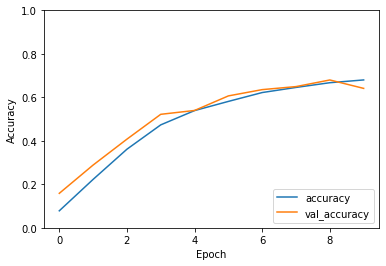

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

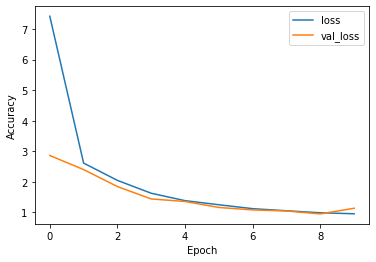

In [15]:

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')